In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('senators.csv', encoding='ISO-8859-1')


In [3]:
df.head()


,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
0,10/19/17 21:47,We released bipartisan healthcare bill today &...,https://twitter.com/amyklobuchar/status/921130...,21,129,533,amyklobuchar,K000367,D,MN
1,10/19/17 18:48,I spoke with @Morning_Joe team abt #HonestAds ...,https://twitter.com/amyklobuchar/status/921085...,8,46,150,amyklobuchar,K000367,D,MN
2,10/19/17 18:14,Lots of interest in my bill with Senators Warn...,https://twitter.com/amyklobuchar/status/921077...,36,227,932,amyklobuchar,K000367,D,MN
3,10/19/17 18:04,"Today's the day @MarkWarner, @SenJohnMcCain &a...",https://twitter.com/amyklobuchar/status/921074...,17,167,550,amyklobuchar,K000367,D,MN
4,10/19/17 16:33,".@MarkWarner, @SenJohnMcCain &amp; I put toget...",https://twitter.com/amyklobuchar/status/921051...,31,279,893,amyklobuchar,K000367,D,MN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288615 entries, 0 to 288614
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_at   288615 non-null  object
 1   text         288615 non-null  object
 2   url          288615 non-null  object
 3   replies      288615 non-null  int64 
 4   retweets     288615 non-null  int64 
 5   favorites    288615 non-null  int64 
 6   user         288615 non-null  object
 7   bioguide_id  288615 non-null  object
 8   party        288615 non-null  object
 9   state        288615 non-null  object
dtypes: int64(3), object(7)
memory usage: 22.0+ MB


In [5]:
df['party'].value_counts()

R    146278
D    136082
I      6255
Name: party, dtype: int64

<AxesSubplot: xlabel='party', ylabel='count'>

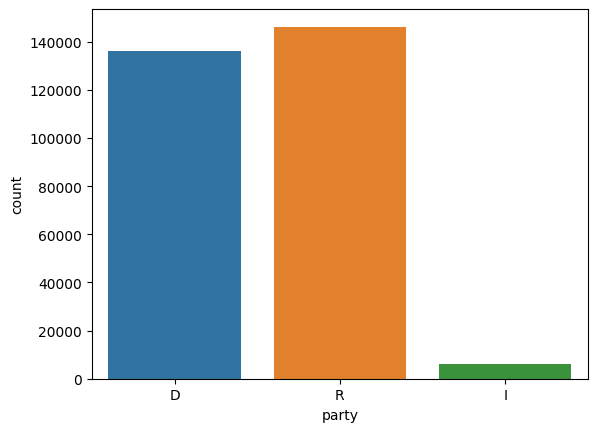

In [6]:
sns.countplot(data=df, x='party')

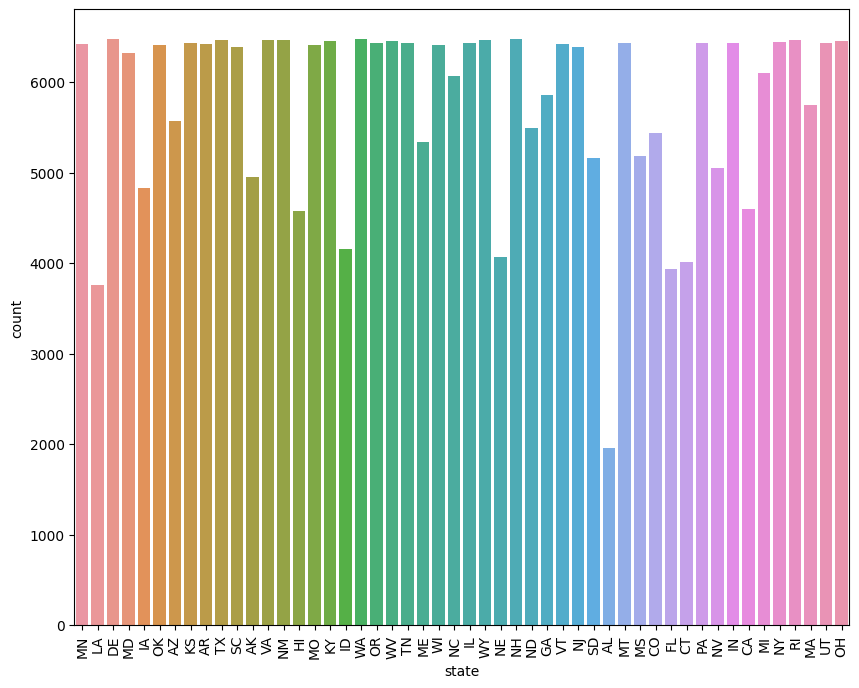

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='state');
plt.xticks(rotation=90);

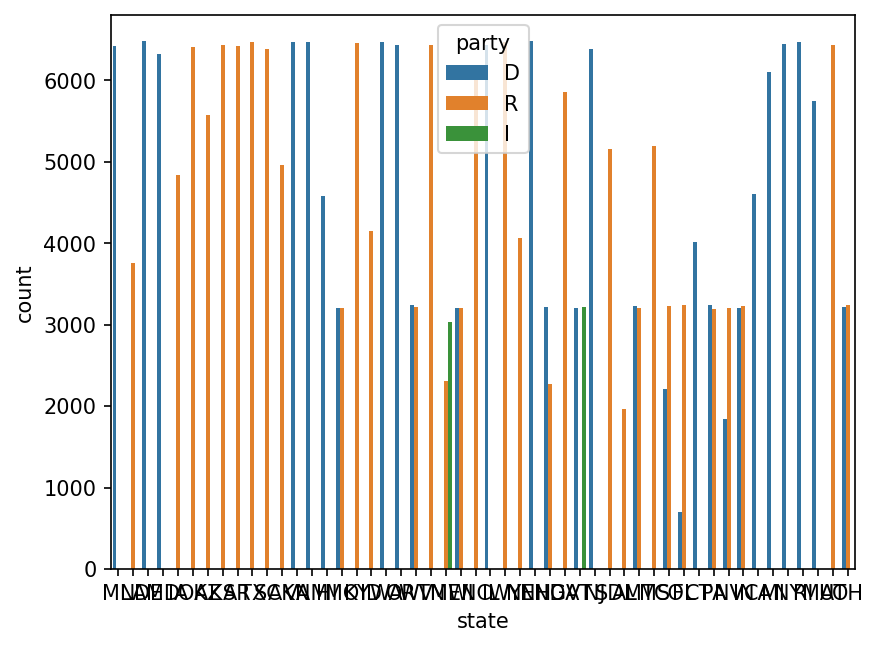

In [8]:
plt.figure(dpi=150)
sns.countplot(data=df, x='state', hue='party');

Features and Label

For this, we want to get the raw data text for the analysis.

In [9]:
data = df[['party','text']]
data

,party,text
0,D,We released bipartisan healthcare bill today &...
1,D,I spoke with @Morning_Joe team abt #HonestAds ...
2,D,Lots of interest in my bill with Senators Warn...
3,D,"Today's the day @MarkWarner, @SenJohnMcCain &a..."
4,D,".@MarkWarner, @SenJohnMcCain &amp; I put toget..."
...,...,...
288610,D,Such a zone would allow the flow of unfettered...
288611,D,I welcome greater cooperation between the U.S....
288612,D,Educacií_n sobre la prevencií_n del abuso sexu...
288613,D,Education on sexual assault prevention should ...


In [10]:
X = data['text']
y = data['party']

Train test split

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
tfidf = TfidfVectorizer(stop_words = 'english')


In [15]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [16]:
X_train_tfidf

<173169x218850 sparse matrix of type '<class 'numpy.float64'>'
	with 2067827 stored elements in Compressed Sparse Row format>

Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC


Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC

rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

In [20]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

Performance Evaluation

In [61]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay 



# custom function
def report(model):
    pred = model.predict(X_test_tfidf)
    print(classification_report(y_test, pred, labels=np.unique(pred)))
    
    disp = ConfusionMatrixDisplay(self.model , self.X_test_tfidf, self.y_test)
    disp = disp.plot(cmap=plt.cm.Blues)
    #disp.ax_.set_title('Confusion Matrix')

    print(disp.confusion_matrix)



              precision    recall  f1-score   support

           D       0.83      0.84      0.84     27034
           R       0.84      0.87      0.85     29337

   micro avg       0.84      0.86      0.85     56371
   macro avg       0.84      0.86      0.85     56371
weighted avg       0.84      0.86      0.85     56371



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (5).

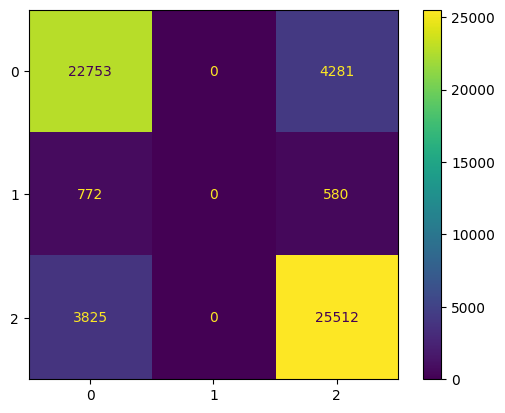

In [62]:
report(nb)

Finalizing a PipeLine for Deployment on New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [ ]:
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scv', LinearSVC()),
])

# fit on entire data
pipe.fit(X, y)

In [ ]:
new_tweet = ['I did enjoy the election']
pipe.predict(new_tweet)

In [ ]:
new_tweet = ['I did vote in NY and LA']
pipe.predict(new_tweet)

In [ ]:
new_tweet = ['it just ok election']
pipe.predict(new_tweet)

In [ ]:
new_tweet = ['so so election']
pipe.predict(new_tweet)